In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris(as_frame = True)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [3]:
X = iris.data[["petal length (cm)","petal width (cm)"]].values
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [4]:
y = (iris.target == 0) #Setosa
y

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: target, Length: 150, dtype: bool

In [5]:
perceptron_classifier = Perceptron(random_state = 42)

perceptron_classifier.fit(X,y)

Perceptron(random_state=42)

In [6]:
X_new = [[2,0.5],[3,1]]
y_pred = perceptron_classifier.predict(X_new)

In [7]:
y_pred

array([ True, False])

Perceptron class is equivalent to use SGD Classifier with specific hyperparameters

Regression MLPs

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
housing = fetch_california_housing()
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data, housing.target,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,random_state = 42)

In [10]:
mlp_regressor = MLPRegressor(hidden_layer_sizes= [50,50,50], random_state = 42) #Tree hidden layers with 50 neurons each
pipeline = make_pipeline(StandardScaler(),mlp_regressor)
pipeline.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=[50, 50, 50],
                              random_state=42))])

In [11]:
y_pred = pipeline.predict(X_valid)

In [12]:
rmse = mean_squared_error(y_valid,y_pred)
rmse**(1/2)

0.5053326657968823

Implementing MLPs with keras:

In [13]:
import tensorflow as tf

f_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [14]:
(X_train_full, y_train_full), (X_test,y_test) = f_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [15]:
X_train.shape

(55000, 28, 28)

In [16]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255. , X_test / 255.

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [18]:
class_names[y_train[0]]

'Ankle boot'

In [19]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation = "relu"))
model.add(tf.keras.layers.Dense(10,activation = "softmax"))

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
hidden1 = model.layers[1]

In [23]:
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

In [24]:
biases.shape

(300,)

In [26]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "sgd",metrics = ["accuracy"])

In [27]:
history = model.fit(X_train,y_train,epochs = 30,validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7668 - loss: 0.7123 - val_accuracy: 0.8278 - val_loss: 0.5047
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8314 - loss: 0.4862 - val_accuracy: 0.8394 - val_loss: 0.4541
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8453 - loss: 0.4425 - val_accuracy: 0.8470 - val_loss: 0.4315
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8542 - loss: 0.4156 - val_accuracy: 0.8512 - val_loss: 0.4158
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8600 - loss: 0.3952 - val_accuracy: 0.8544 - val_loss: 0.4044
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8657 - loss: 0.3789 - val_accuracy: 0.8564 - val_loss: 0.3950
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8705 - loss: 0.3651 - val_accuracy: 0.8576 - val_loss: 0.3867
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8745 - loss: 0.3533 - 

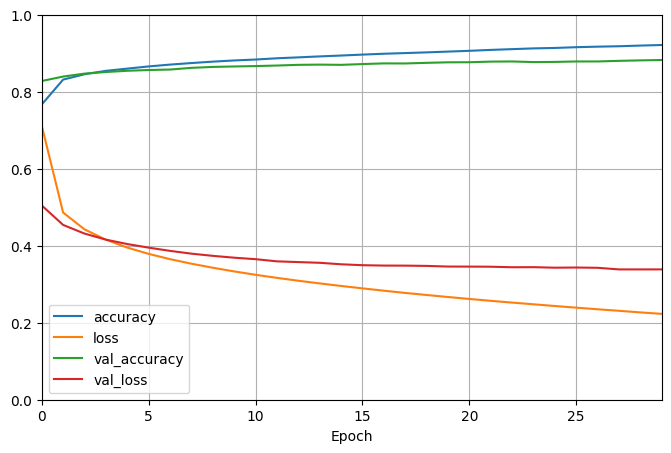

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5), xlim = [0,29], ylim = [0,1], grid = True, xlabel = "Epoch")
plt.show()

In [32]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8775 - loss: 0.3593


[0.3592599332332611, 0.8774999976158142]

In [34]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [46]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)
y_pred = y_prob.argmax(axis = 1)
class_names = np.array(class_names)
class_names[y_pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')